# **Plywood Dimensions**(m)

In [ ]:
L = 0.28
B = 0.15
H = 0.019
Arrangement = input("V or H: ")
N = int(input("No. of Plywood: "))

V or H: H
No. of Plywood: 2


In [ ]:
if Arrangement == 'H':
  T_H = N*H
  TotalSA = (2*L*B)+(2*L*T_H)+(2*T_H*B)
  #surface area exposed
  SA = TotalSA - (L*B)
  print("SA: ",SA)
if Arrangement == 'V':
  TotalSA = N*((2*L*B)+(2*L*H)+(2*H*B))
  SA = TotalSA - (N*B*H)
  print("SA: ",SA)

SA:  0.07468


#SURFACE AREA EXPOSED
H_2 = 0.07486 m^2

V_2 = 0.19498 m^2

H_3 = 0.09102 m^2

V_3 = 0.12447 m^2

H_5 = 0.12370 m^2

V_5 = 0.48745 m^2

#MAXIMUM HCHO EMITTED
V2 = 1.17(0.89) mg/m³

H2 = 0.73 mg/m³ (Temp: 25°C)

V3 =  mg/m³

H3 = 0.75 mg/m³ (Temp: 25°C)

V5 =  mg/m³

H5 =  mg/m³


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
vert_2 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_Ply_2V.xlsx")
vert_2.drop(vert_2.index[:38], axis=0, inplace=True)
vert_2['Time'] = pd.to_datetime(vert_2['Time'])
vert_2['Minutes'] = vert_2['Time'].diff().dt.total_seconds().cumsum().div(60).round()
vert_2 = vert_2.drop(['Time','No.'], axis=1).fillna(0)
vert_2 = vert_2[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
vert_2 = vert_2.rename(columns = {'HCHO (mg/m³)':'HCHO_V2', 'PM2.5 (ug/m³)':'PM2.5_V2', 'TVOC (mg/m³)':'TVOC_V2', 'AQI ':'AQI_V2'})
vert_2.columns
vert_2.drop(vert_2.index[42:55], axis=0, inplace=True)
vert_2.shape
vert_2
max(vert_2['HCHO_V2'])

1.17

In [ ]:
horz_2 = pd.read_excel("/content/gdrive/MyDrive/Experiment Data/KD_horizontal_2.xlsx")
horz_2['Time'] = pd.to_datetime(horz_2['Time'])
horz_2['Minutes'] = horz_2['Time'].diff().dt.total_seconds().cumsum().div(60).round()
horz_2 = horz_2.drop(['Time','No.'], axis=1).fillna(0)
horz_2 = horz_2[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
horz_2.drop(horz_2.index[42:55], axis=0, inplace=True)
horz_2 = horz_2.rename(columns = {'HCHO (mg/m³)':'HCHO_H2', 'PM2.5 (ug/m³)':'PM2.5_H2', 'TVOC (mg/m³)':'TVOC_H2', 'AQI ':'AQI_H2'})
horz_2.columns
horz_2.head(10)
horz_2.shape
max(horz_2['HCHO_H2'])

0.73

In [ ]:
vert_3 = pd.read_excel("/content/gdrive/MyDrive/Experiment Data/KD_vertical_3.xlsx")
vert_3.drop(vert_3.index[0:20],axis=0, inplace=True)
vert_3['Time'] = pd.to_datetime(vert_3['Time'])
vert_3['Minutes'] = vert_3['Time'].diff().dt.total_seconds().cumsum().div(60).round()
vert_3 = vert_3.drop(['Time','No.'], axis=1).fillna(0)
vert_3 = vert_3[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
#vert_3.drop(vert_3.index[42:54], axis=0, inplace=True)
vert_3 = vert_3.rename(columns = {'HCHO (mg/m³)':'HCHO_V3', 'PM2.5 (ug/m³)':'PM2.5_V3', 'TVOC (mg/m³)':'TVOC_V3', 'AQI ':'AQI_V3'})
vert_3.columns
vert_3.head(10)
vert_3.shape
max(vert_3['HCHO_V3'])

0.89

In [ ]:
horz_3 = pd.read_excel("/content/gdrive/MyDrive/Experiment Data/KD_horizontal_3.xlsx")
horz_3['Time'] = pd.to_datetime(horz_3['Time'])
horz_3['Minutes'] = horz_3['Time'].diff().dt.total_seconds().cumsum().div(60).round()
horz_3 = horz_3.drop(['Time','No.'], axis=1).fillna(0)
#horz_3.drop(horz_3.index[42:52], axis=0, inplace=True)
horz_3 = horz_3.rename(columns = {'HCHO (mg/m³)':'HCHO_H3', 'PM2.5 (ug/m³)':'PM2.5_H3', 'TVOC (mg/m³)':'TVOC_H3', 'AQI ':'AQI_H3'})
horz_3.columns
horz_3.head(10)
horz_3.shape
max(horz_3['HCHO_H3'])

0.75

In [ ]:
df = pd.merge(horz_2, vert_2, on='Minutes')
df.head(5)

,Minutes,HCHO_H2,PM2.5_H2,TVOC_H2,AQI_H2,HCHO_V2,PM2.5_V2,TVOC_V2,AQI_V2
0,0.0,0.32,105,1.66,176,0.76,47,2.85,130
1,5.0,0.43,91,1.96,168,0.84,42,3.07,117
2,10.0,0.47,86,2.06,166,0.89,38,3.22,107
3,15.0,0.49,79,2.12,162,0.92,36,3.30,102
4,20.0,0.50,75,2.14,160,0.95,36,3.37,102


In [ ]:
df = pd.merge(df, vert_3, on='Minutes')
df.head(5)

,Minutes,HCHO_H2,PM2.5_H2,TVOC_H2,AQI_H2,HCHO_V2,PM2.5_V2,TVOC_V2,AQI_V2,HCHO_V3,PM2.5_V3,TVOC_V3,AQI_V3
0,0.0,0.32,105,1.66,176,0.76,47,2.85,130,0.73,57,2.78,151
1,5.0,0.43,91,1.96,168,0.84,42,3.07,117,0.87,51,3.15,140
2,10.0,0.47,86,2.06,166,0.89,38,3.22,107,0.88,47,3.18,130
3,15.0,0.49,79,2.12,162,0.92,36,3.30,102,0.85,43,3.11,120
4,20.0,0.50,75,2.14,160,0.95,36,3.37,102,0.84,41,3.06,115


In [ ]:
df = pd.merge(df, horz_3, on='Minutes')
df.head(5)

,Minutes,HCHO_H2,PM2.5_H2,TVOC_H2,AQI_H2,HCHO_V2,PM2.5_V2,TVOC_V2,AQI_V2,HCHO_V3,PM2.5_V3,TVOC_V3,AQI_V3,HCHO_H3,PM2.5_H3,TVOC_H3,AQI_H3
0,0.0,0.32,105,1.66,176,0.76,47,2.85,130,0.73,57,2.78,151,0.10,92,0.64,169
1,5.0,0.43,91,1.96,168,0.84,42,3.07,117,0.87,51,3.15,140,0.18,77,1.04,161
2,10.0,0.47,86,2.06,166,0.89,38,3.22,107,0.88,47,3.18,130,0.32,61,1.66,153
3,20.0,0.50,75,2.14,160,0.95,36,3.37,102,0.84,41,3.06,115,0.33,57,1.69,151
4,25.0,0.51,72,2.17,158,0.98,33,3.45,95,0.82,40,3.03,112,0.37,54,1.79,147


Text(0, 0.5, 'HCHO (mg/m³)')

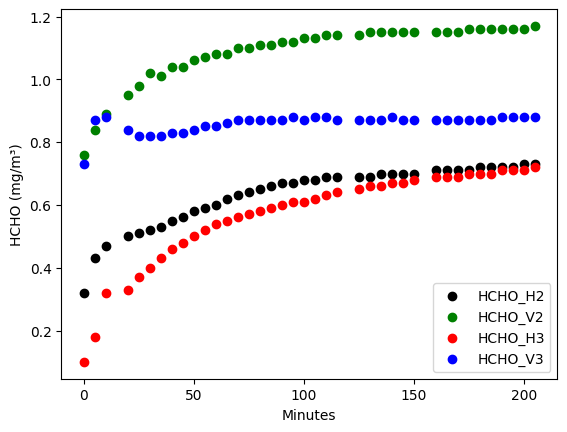

In [ ]:
Y1 = df['HCHO_H2']
Y2 = df['HCHO_V2']
Y3 = df['HCHO_H3']
Y4 = df['HCHO_V3']
X = df['Minutes']
fig, ax = plt.subplots()
ax.scatter(X, Y1, color='k', label = 'HCHO_H2')
ax.scatter(X, Y2, color='g', label = 'HCHO_V2')
ax.scatter(X, Y3, color='r', label = 'HCHO_H3')
ax.scatter(X, Y4, color='b', label = 'HCHO_V3')
leg = ax.legend(loc ="lower right");
ax.set_xlabel("Minutes")
ax.set_ylabel("HCHO (mg/m³)")

In [ ]:
df.describe()

,Minutes,HCHO_H2,PM2.5_H2,TVOC_H2,AQI_H2,HCHO_V2,PM2.5_V2,TVOC_V2,AQI_V2,HCHO_V3,PM2.5_V3,TVOC_V3,AQI_V3,HCHO_H3,PM2.5_H3,TVOC_H3,AQI_H3
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,101.447368,0.633947,45.368421,2.512105,116.684211,0.943684,65.894737,3.354211,140.210526,0.859737,24.000000,3.126316,75.789474,0.566053,33.421053,2.314737,94.736842
std,61.555379,0.096717,21.073130,0.264393,33.934838,0.053293,33.621735,0.146889,35.185345,0.028426,12.033736,0.076244,27.608418,0.150773,17.936271,0.466527,33.987028
min,0.000000,0.320000,20.000000,1.660000,67.000000,0.690000,26.000000,2.660000,80.000000,0.730000,10.000000,2.780000,41.000000,0.100000,13.000000,0.640000,52.000000
25%,51.250000,0.582500,28.750000,2.370000,85.750000,0.932500,40.250000,3.317500,112.750000,0.852500,15.000000,3.112500,56.000000,0.505000,21.000000,2.172500,69.000000
50%,97.500000,0.675000,40.500000,2.620000,113.500000,0.960000,58.500000,3.390000,151.500000,0.870000,20.500000,3.160000,68.000000,0.610000,29.500000,2.450000,87.500000
75%,148.750000,0.700000,56.250000,2.697500,150.000000,0.970000,86.000000,3.430000,165.500000,0.870000,30.250000,3.170000,89.250000,0.677500,41.000000,2.627500,115.000000
max,205.000000,0.730000,105.000000,2.780000,176.000000,0.990000,158.000000,3.490000,208.000000,0.880000,57.000000,3.180000,151.000000,0.720000,92.000000,2.740000,169.000000


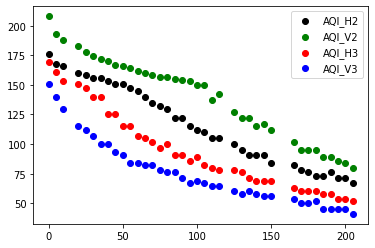

In [ ]:
Y1 = df['AQI_H2']
Y2 = df['AQI_V2']
Y3 = df['AQI_H3']
Y4 = df['AQI_V3']
X = df['Minutes']
fig, ax = plt.subplots()
ax.scatter(X, Y1, color='k', label = 'AQI_H2')
ax.scatter(X, Y2, color='g', label = 'AQI_V2')
ax.scatter(X, Y3, color='r', label = 'AQI_H3')
ax.scatter(X, Y4, color='b', label = 'AQI_V3')
leg = ax.legend(loc ="upper right");

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

slope b1 is 0.0014004232814164514
intercept b0 is 0.49187811184577823


Text(0, 0.5, 'Dependent variable y')

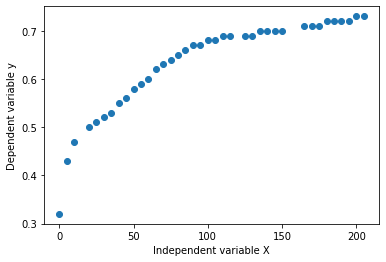

In [ ]:
x = df['Minutes']
y = df['HCHO_H2']
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean

Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean

b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)

plt.scatter(x,y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')

Text(0, 0.5, 'y')

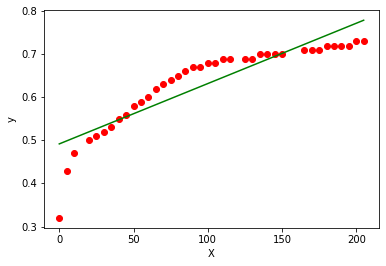

In [ ]:
y_pred = b1 * x + b0

plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square error is', rmse)

SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 0.07115873803948435
mean squared error is 0.0018725983694601143
root mean square error is 0.04327352966260222
R square is 0.794403019631815


In [ ]:
x_V2 = df['Minutes']
y_V2 = df['HCHO_V2']
n = np.size(x_V2)

x_mean_V2 = np.mean(x_V2)
y_mean_V2 = np.mean(y_V2)
x_mean_V2,y_mean_V2

Sxy_V2 = np.sum(x_V2*y_V2)- n*x_mean_V2*y_mean_V2
Sxx_V2 = np.sum(x_V2*x_V2)-n*x_mean_V2*x_mean_V2

b1_V2 = Sxy_V2/Sxx_V2
b0_V2 = y_mean_V2-b1_V2*x_mean_V2
print('slope b1 is', b1_V2)
print('intercept b0 is', b0_V2)

plt.scatter(x_V2,y_V2)
plt.xlabel('Minutes')
plt.ylabel('HCHO_V2')

Text(0, 0.5, 'y')

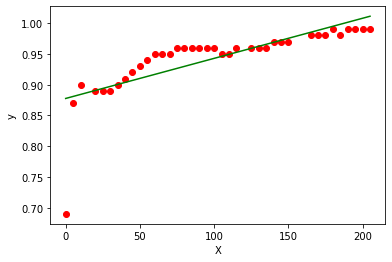

In [ ]:
y_pred_V2 = b1_V2 * x_V2 + b0_V2

plt.scatter(x_V2, y_V2, color = 'red')
plt.plot(x_V2, y_pred_V2, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
error_V2 = y_V2 - y_pred_V2
se_V2 = np.sum(error_V2**2)
print('squared error is', se_V2)

mse_V2 = se_V2/n
print('mean squared error is', mse_V2)

rmse_V2 = np.sqrt(mse_V2)
print('root mean square error is', rmse_V2)

SSt_V2 = np.sum((y_V2 - y_mean_V2)**2)
R2_V2 = 1- (se_V2/SSt_V2)
print('R square is', R2_V2)

squared error is 0.04556483948624337
mean squared error is 0.0011990747233221939
root mean square error is 0.03462765835747768
R square is 0.566396899610025


slope b1 is 0.00219170612444098
intercept b0 is 0.34370981290210584


Text(0, 0.5, 'HCHO_H3')

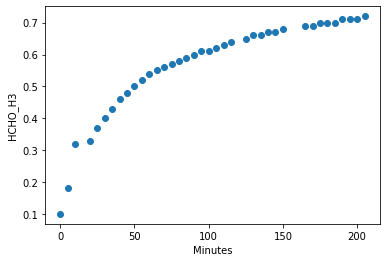

In [ ]:
x_H3 = df['Minutes']
y_H3 = df['HCHO_H3']
n = np.size(x_H3)

x_mean_H3 = np.mean(x_H3)
y_mean_H3 = np.mean(y_H3)
x_mean_H3,y_mean_H3

Sxy_H3 = np.sum(x_H3*y_H3)- n*x_mean_H3*y_mean_H3
Sxx_H3 = np.sum(x_H3*x_H3)-n*x_mean_H3*x_mean_H3

b1_H3 = Sxy_H3/Sxx_H3
b0_H3 = y_mean_H3-b1_H3*x_mean_H3
print('slope b1 is', b1_H3)
print('intercept b0 is', b0_H3)

plt.scatter(x_H3,y_H3)
plt.xlabel('Minutes')
plt.ylabel('HCHO_H3')

Text(0, 0.5, 'y')

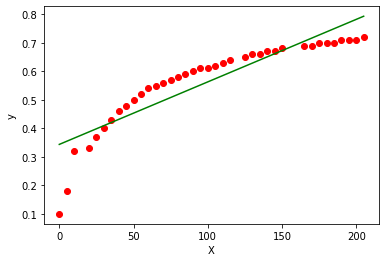

In [ ]:
y_pred_H3 = b1_H3 * x_H3 + b0_H3

plt.scatter(x_H3, y_H3, color = 'red')
plt.plot(x_H3, y_pred_H3, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
error_H3 = y_H3 - y_pred_H3
se_H3 = np.sum(error_H3**2)
print('squared error is', se_H3)

mse_H3 = se_H3/n
print('mean squared error is', mse_H3)

rmse_H3 = np.sqrt(mse_H3)
print('root mean square error is', rmse_H3)

SSt_H3 = np.sum((y_H3 - y_mean_H3)**2)
R2_H3 = 1- (se_H3/SSt_H3)
print('R square is', R2_H3)

squared error is 0.16766869829232703
mean squared error is 0.004412334165587554
root mean square error is 0.06642540301411466
R square is 0.8006573242963251


slope b1 is 0.0002789997043599776
intercept b0 is 0.8314330563076918


Text(0, 0.5, 'HCHO_V3')

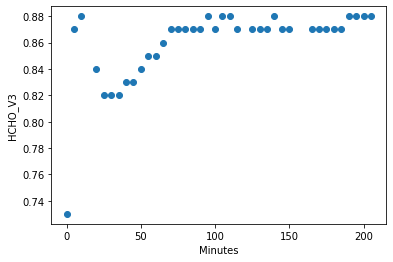

In [ ]:
x_V3 = df['Minutes']
y_V3 = df['HCHO_V3']
n = np.size(x_V3)

x_mean_V3 = np.mean(x_V3)
y_mean_V3 = np.mean(y_V3)
x_mean_V3,y_mean_V3

Sxy_V3 = np.sum(x_V3*y_V3)- n*x_mean_V3*y_mean_V3
Sxx_V3 = np.sum(x_V3*x_V3)-n*x_mean_V3*x_mean_V3

b1_V3 = Sxy_V3/Sxx_V3
b0_V3 = y_mean_V3-b1_V3*x_mean_V3
print('slope b1 is', b1_V3)
print('intercept b0 is', b0_V3)

plt.scatter(x_V3,y_V3)
plt.xlabel('Minutes')
plt.ylabel('HCHO_V3')

Text(0, 0.5, 'y')

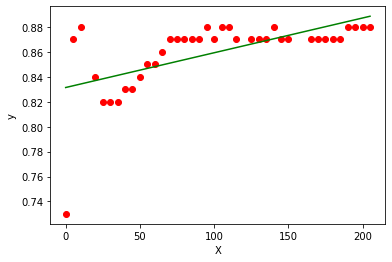

In [ ]:
y_pred_V3 = b1_V3 * x_V3 + b0_V3

plt.scatter(x_V3, y_V3, color = 'red')
plt.plot(x_V3, y_pred_V3, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
error_V3 = y_V3 - y_pred_V3
se_V3 = np.sum(error_V3**2)
print('squared error is', se_V3)

mse_V3 = se_V3/n
print('mean squared error is', mse_V3)

rmse_V3 = np.sqrt(mse_V3)
print('root mean square error is', rmse_V3)

SSt_V3 = np.sum((y_V3 - y_mean_V3)**2)
R2_V3 = 1- (se_V3/SSt_V3)
print('R square is', R2_V3)

squared error is 0.01898444182696145
mean squared error is 0.0004995905743937223
root mean square error is 0.022351522865203668
R square is 0.36501294831041786


In [ ]:
MDF_V3 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_MDF_3V.xlsx")
MDF_V3['Time'] = pd.to_datetime(MDF_V3['Time'])
MDF_V3['Minutes'] = MDF_V3['Time'].diff().dt.total_seconds().cumsum().div(60).round()
MDF_V3 = MDF_V3.drop(['Time','No.'], axis=1).fillna(0)
MDF_V3 = MDF_V3[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
MDF_V3.drop(MDF_V3.index[42:52], axis=0, inplace=True)
MDF_V3 = MDF_V3.rename(columns = {'HCHO (mg/m³)':'HCHO_MDF_V3', 'PM2.5 (ug/m³)':'PM2.5_MDF_V3', 'TVOC (mg/m³)':'TVOC_MDF_V3', 'AQI ':'AQI_MDF_V3'})
MDF_V3.columns
MDF_V3.head(15)
#MDF_V3.shape

,Minutes,HCHO_MDF_V3,PM2.5_MDF_V3,TVOC_MDF_V3,AQI_MDF_V3
0,0.0,0.11,35,0.67,100
1,5.0,0.14,31,0.84,91
2,10.0,0.16,28,0.90,84
3,20.0,0.16,26,0.92,80
4,25.0,0.17,25,0.95,78
5,35.0,0.17,24,0.97,76
6,40.0,0.17,22,0.98,71
7,45.0,0.18,22,1.00,71
8,50.0,0.18,20,1.01,67
9,55.0,0.18,19,1.02,65


In [ ]:
Ply_MDF = pd.merge(vert_3, MDF_V3, on='Minutes')
Ply_MDF.head(5)

,Minutes,HCHO_V3,PM2.5_V3,TVOC_V3,AQI_V3,HCHO_MDF_V3,PM2.5_MDF_V3,TVOC_MDF_V3,AQI_MDF_V3
0,0.0,0.73,57,2.78,151,0.11,35,0.67,100
1,5.0,0.87,51,3.15,140,0.14,31,0.84,91
2,10.0,0.88,47,3.18,130,0.16,28,0.90,84
3,20.0,0.84,41,3.06,115,0.16,26,0.92,80
4,25.0,0.82,40,3.03,112,0.17,25,0.95,78


In [ ]:
Y1 = Ply_MDF['HCHO_V3']
Y2 = Ply_MDF['HCHO_MDF_V3']

X = Ply_MDF['Minutes']
fig, ax = plt.subplots()
ax.scatter(X, Y1, color='k', label = 'HCHO_V3')
ax.scatter(X, Y2, color='g', label = 'HCHO_MDF_V3')

leg = ax.legend(loc ="lower right");

In [ ]:
vert_5 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_5_V_ply.xlsx")
vert_5['Time'] = pd.to_datetime(vert_5['Time'])
vert_5['Minutes'] = vert_5['Time'].diff().dt.total_seconds().cumsum().div(60).round()
vert_2 = vert_5.drop(['Time','No.'], axis=1).fillna(0)
vert_5 = vert_5[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
# vert_5.drop(vert_5.index[0:20], axis=0, inplace=True)
vert_5
max(vert_5['HCHO (mg/m³)'])
#vert_5.shape

0.89

In [ ]:
horz_5 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_5_H_ply(new).xlsx")
horz_5['Time'] = pd.to_datetime(horz_5['Time'])
horz_5['Minutes'] = horz_5['Time'].diff().dt.total_seconds().cumsum().div(60).round()
horz_5 = horz_5.drop(['Time','No.'], axis=1).fillna(0)
horz_5 = horz_5[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
#horz_2.drop(horz_2.index[42:55], axis=0, inplace=True)
max(horz_5['HCHO (mg/m³)'])

0.39

In [ ]:
MDF_V_5 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_5_V_MDF.xlsx")
MDF_V_5['Time'] = pd.to_datetime(MDF_V_5['Time'])
MDF_V_5['Minutes'] = MDF_V_5['Time'].diff().dt.total_seconds().cumsum().div(60).round()
MDF_V_2 = MDF_V_5.drop(['Time','No.'], axis=1).fillna(0)
MDF_V_5 = MDF_V_5[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
MDF_V_5.drop(MDF_V_5.index[32:82], axis=0, inplace=True)
MDF_V_5

,Minutes,HCHO (mg/m³),PM2.5 (ug/m³),TVOC (mg/m³),AQI
0,NaN,0.84,32,3.08,93
1,5.0,0.84,31,3.09,91
2,10.0,0.85,29,3.09,86
3,20.0,0.85,29,3.10,86
4,25.0,0.85,28,3.11,84
5,30.0,0.85,27,3.11,82
6,35.0,0.86,26,3.12,80
7,40.0,0.86,26,3.12,80
8,45.0,0.86,23,3.12,73
9,50.0,0.86,24,3.13,76


In [ ]:
Ply_MDF_V5 = pd.merge(vert_5, MDF_V_5, on='Minutes')
Ply_MDF_V5.head(5)

NameError: ignored

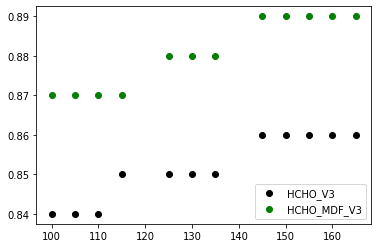

In [ ]:
Y1 = Ply_MDF_V5['HCHO (mg/m³)_x']
Y2 = Ply_MDF_V5['HCHO (mg/m³)_y']

X = Ply_MDF_V5['Minutes']
fig, ax = plt.subplots()
ax.scatter(X, Y1, color='k', label = 'HCHO_V3')
ax.scatter(X, Y2, color='g', label = 'HCHO_MDF_V3')

leg = ax.legend(loc ="lower right");

In [ ]:
MDF_PLY_6V = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/VOC DATA ANALYSIS/KD_MDF_PLY3V.xlsx")
MDF_PLY_6V['Time'] = pd.to_datetime(MDF_PLY_6V['Time'])
MDF_PLY_6V['Minutes'] = MDF_PLY_6V['Time'].diff().dt.total_seconds().cumsum().div(60).round()
MDF_PLY_6V = MDF_PLY_6V.drop(['Time','No.'], axis=1).fillna(0)
MDF_PLY_6V = MDF_PLY_6V[['Minutes','HCHO (mg/m³)', 'PM2.5 (ug/m³)', 'TVOC (mg/m³)', 'AQI ']]
#MDF_PLY_6V.drop(MDF_PLY_6V.index[42:55], axis=0, inplace=True)
MDF_PLY_6V = MDF_PLY_6V.rename(columns = {'HCHO (mg/m³)':'HCHO', 'PM2.5 (ug/m³)':'PM2.5', 'TVOC (mg/m³)':'TVOC', 'AQI ':'AQI'})
MDF_PLY_6V.columns
MDF_PLY_6V
#MDF_PLY_6V.shape

,Minutes,HCHO,PM2.5,TVOC,AQI
0,0.0,0.22,165,1.21,215
1,5.0,0.24,153,1.33,203
2,10.0,0.25,147,1.35,198
3,15.0,0.25,133,1.37,191
4,20.0,0.26,131,1.40,190
5,25.0,0.27,127,1.45,187
6,30.0,0.27,118,1.49,183
7,35.0,0.28,117,1.51,182
8,40.0,0.27,108,1.46,177
9,45.0,0.27,106,1.47,176


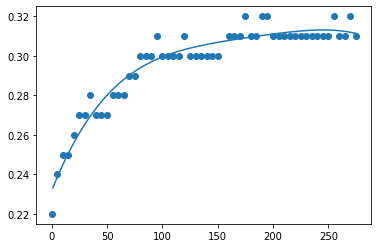

In [ ]:
Y1 = MDF_PLY_6V['HCHO']

X = MDF_PLY_6V['Minutes']
#fig, ax = plt.subplots()
ax.scatter(X, Y1, color='k', label = 'MDF_PLY_6V')
mymodel = np.poly1d(np.polyfit(X, Y1, 4))

myline = np.linspace(1, 275, 100)

plt.scatter(X, Y1)
plt.plot(myline, mymodel(myline))
plt.show()
